In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import yaml
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import precision_recall_curve, roc_curve, average_precision_score, roc_auc_score

%matplotlib inline

In [11]:
perp_fp_fmt = '/fs/cbcb-lab/rob/students/noor/shoal_proj/swim/perp_sal/vb={vb}/{rep}_{cond}/{fold}/perplexity.yml'

In [12]:
REPLICATES = list(range(1,7))
COND = [1,2]
vbpriors = [1e4, 1e3, 1e2, 1e1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
SALMON_QUANTS = {}


In [13]:
def arr_spearman(A, B):
    return spearmanr(A, B).correlation

# Perplexities

In [21]:
def perplexity_plot(rep, cond, vb_priors, folds):
    df = pd.DataFrame()
    for vb_prior in vb_priors:
        #folds_rhos = []
        for fold in range(1, folds + 1):
            #print(perp_fp_fmt.format(rep=rep, cond=cond, vb=vb_prior, fold=fold))
            with open(perp_fp_fmt.format(rep=rep, cond=cond, vb=vb_prior, fold=fold), 'r') as f:
                perp_result = yaml.safe_load(f)
            #folds_rhos.append(rho)
            _vb_prior = float(vb_prior)
            df = df.append(dict(perplexity=perp_result['smoothed_perplexity'],
                                vb_prior=_vb_prior, log_vb_prior = np.log10(_vb_prior),
                                fold=fold), 
                           ignore_index=True)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ax.set_title('Sample {}_{}'.format(rep, cond), fontsize=20)
    sns.lineplot(x="log_vb_prior", y="perplexity", data=df, ax=ax, units="fold", estimator=None, color='#AAAAAA')
    sns.lineplot(x="log_vb_prior", y="perplexity", data=df, ax=ax, err_style=None, lw=3, color="red")
    
    ax.set_ylabel('Perplexity', fontsize=20)
    ax.set_xlabel('Log VBEM prior size', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)

    plt.show()
    
    
    return ax

#perplexity_plot(SAMPLES[0], VB_PRIORS, 5)

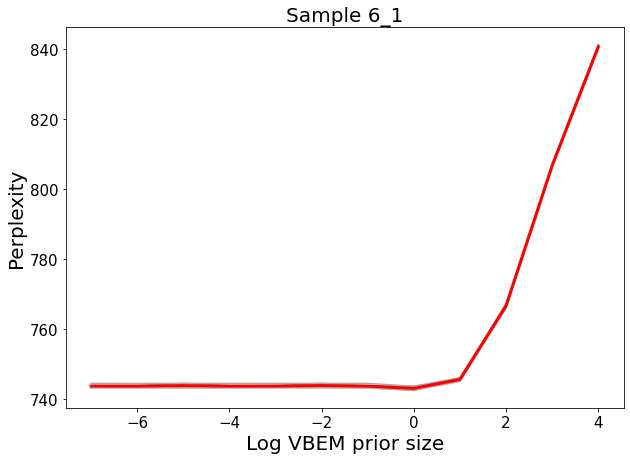

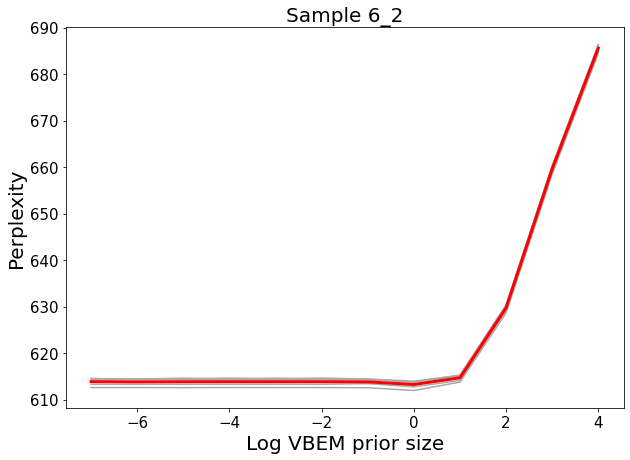

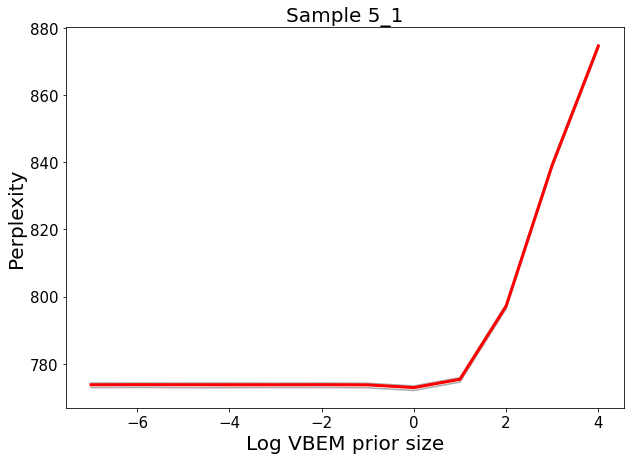

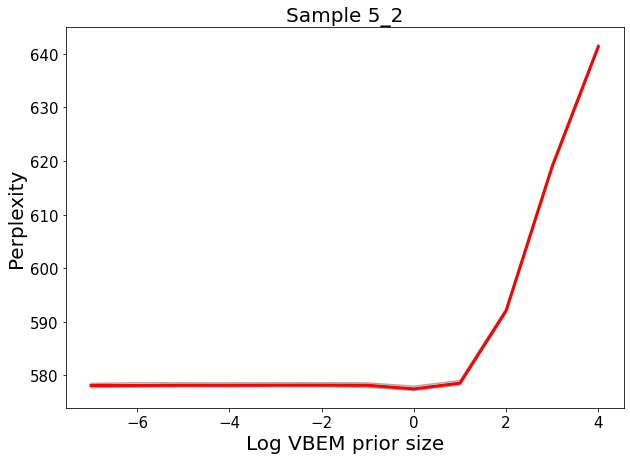

<AxesSubplot:title={'center':'Sample 5_2'}, xlabel='Log VBEM prior size', ylabel='Perplexity'>

In [23]:
perplexity_plot("6","1", vbpriors, 5)
perplexity_plot("6","2", vbpriors, 5)

perplexity_plot("5","1", vbpriors, 5)
perplexity_plot("5","2", vbpriors, 5)